# **APROXIMACIÓN DE DOS FUNCIONES POR SERIES DE TAYLOR** 

En este notebook se trabajarán las series de Taylor para las siguientes dos funciones:

1) $$f_1 (x)= 2 sen^2(x) + x$$

2) $$f_2(x)= 2 sen^2(x) \cdot e^{(-0.1x^2)} $$

¿Qué necesitamos para nuestras aproximaciones?:

La serie de Taylor de una función $f(x)$ alrededor de un punto $x_0$ está definida como:

$f(x)=\sum _{n=0} ^ \infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n $, donde $f^n (x_0)$ es la derivada n-ésima alrededor del punto de expansión. Por lo tanto necesitamos definir una función en nuestro programa que calcule la derivada $n$ de una $f(x)$ arbitraria.

Recordando la definición de la derivada de $f(x)$ (por el límite) es:

$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$

Por lo que su n-ésima derivada está dada por:

$ f^{(n)}(x) = \lim_{h \to 0} \frac{1}{h^n} \sum_{k=0}^{n} (-1)^{n-k} \binom{n}{k} f(x + kh) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)$

Creamos la función que calcula $f^{(n)}(x_0)$:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
def n_derivada(f, x, h, n): #f es la función, x es un argumento arbitrario (en este caso es un escalar real). 
    
    #h es el paso con el que se va recorriendo, en este programa, numéricamente no puede llegar a cero. 
    
    #n es la cota máxima correspondiente al orden de la derivada.
    
    t= 0 #Definimos un contador para ir almacenando las sumas.
    
    for k in range(n+1): #n+1 por la numeración en python, si ponemos n sólo tomará valres en el intervalo[0,n-1]
        t= t + (-1)**(k+n) * math.factorial(n) / (math.factorial(k) * math.factorial(n-k)) * f(x + k*h)
    return t / h**n

Definimos nuestras funciones:

In [5]:
def f1(x):
    return 2*np.sin(x)**2 + x

In [6]:
def f2(x):
    return 2*np.sin(x)**2 * np.exp(-0.1*x**2)

Ejemplos de la aplicación de n_derivada:

In [11]:
n_derivada(f1,10.5,0.1,1) #Primera derivada de f1 evaluada en 10.5, con h=0.1

2.5529969724111723

In [12]:
n_derivada(f1,10.5,0.1,2) #Segunda derivada de f1 evaluada en 10.5

-2.802754599797907

Habiendo definido una función en python que te calcule la n-ésima derivada de una función matemática, ahora definimos una función en python que expanda en series de Taylor las funciones asociadas a este ejercicio (el funcionamiento es análogo):

In [7]:
#Ahora, con respecto a la función n_derivada, tenemos un parámetro extra x que es lo que va a variar en un intervalo dado.
def exp_Taylor(f,x,x_0,h,n):
    t=0
    for n in range(n+1):
        t= t+ ( (n_derivada(f,x_0,h,n)*(x-x_0)**n)/math.factorial(n)) 
    return t

**$\blacksquare$ Visualizamos gráficamente la expansión en series de Taylor para $f_1 (x)$:**

(Definimos convencionalmente $h=0.05$, $n=15$ y un rango de $x \in [-10,10]$)

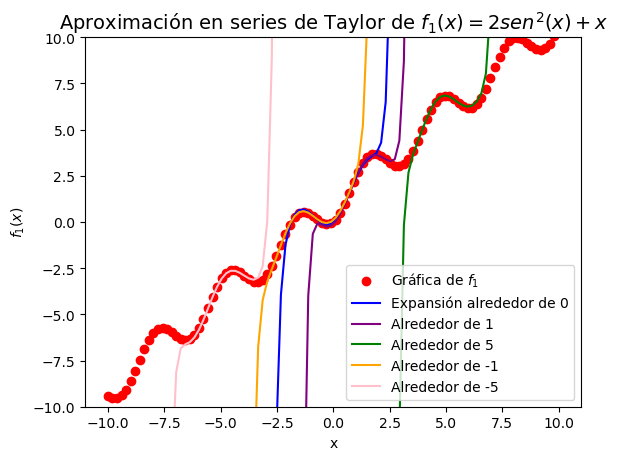

In [64]:
plt.title(r'Aproximación en series de Taylor de $f_1 (x)= 2 sen^2(x) + x$', fontsize=14)
plt.xlabel('x')
plt.ylabel(r'$f_1(x)$')
plt.ylim([-10,10])
rango_x=np.linspace(-10,10,100)

plt.scatter(rango_x,f1(rango_x), label=r"Gráfica de $f_1$", color="r")
plt.plot(rango_x,exp_Taylor(f1,rango_x,0,0.05,15),"blue", label="Expansión alrededor de 0")
plt.plot(rango_x,exp_Taylor(f1,rango_x,1,0.05,15),"purple", label="Alrededor de 1")
plt.plot(rango_x,exp_Taylor(f1,rango_x,5,0.05,15),"green", label="Alrededor de 5")
plt.plot(rango_x,exp_Taylor(f1,rango_x,-1,0.05,15),"orange", label="Alrededor de -1")
plt.plot(rango_x,exp_Taylor(f1,rango_x,-5,0.05,15),"pink", label="Alrededor de -5")



plt.legend()


**$\blacksquare$ Visualizamos gráficamente la expansión en series de Taylor para $f_2 (x)$. Mismas convenciones que para $f_1 (x)$:**

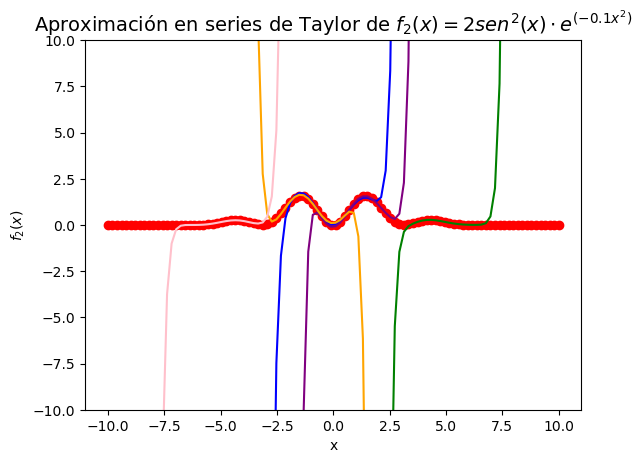

In [11]:
plt.title(r'Aproximación en series de Taylor de $f_2 (x)= 2 sen^2(x) \cdot e^{(-0.1x^2)}$', fontsize=14)
plt.xlabel('x')
plt.ylabel(r'$f_2(x)$')
plt.ylim([-10,10])
rango_x=np.linspace(-10,10,100)

plt.scatter(rango_x,f2(rango_x), label=r"Gráfica de $f_2$", color="r")
plt.plot(rango_x,exp_Taylor(f2,rango_x,0,0.05,15),"blue", label="Expansión alrededor de 0")
plt.plot(rango_x,exp_Taylor(f2,rango_x,1,0.05,15),"purple", label="Alrededor de 1")
plt.plot(rango_x,exp_Taylor(f2,rango_x,5,0.05,15),"green", label="Alrededor de 5")
plt.plot(rango_x,exp_Taylor(f2,rango_x,-1,0.05,15),"orange", label="Alrededor de -1")
plt.plot(rango_x,exp_Taylor(f2,rango_x,-5,0.05,15),"pink", label="Alrededor de -5")

#No pongo el plt.legend() para no estorbar el gráfico

# Fin del ejercicio.